# MLP

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

INPUT_SIZE = 28
HIDDEN1_SIZE = 256
HIDDEN2_SIZE = 256
LR = 0.002
N_CLASSES = 10
TRAINING_EPOCH = 25
BATCH_SIZE = 100

X = tf.placeholder(tf.float32, [None, INPUT_SIZE * INPUT_SIZE])
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

W1 = tf.Variable(tf.random_normal([INPUT_SIZE * INPUT_SIZE, HIDDEN1_SIZE]))
b1 = tf.Variable(tf.random_normal([HIDDEN1_SIZE]))
L1=tf.nn.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([HIDDEN1_SIZE, HIDDEN2_SIZE]))
b2 = tf.Variable(tf.random_normal([HIDDEN2_SIZE]))
L2=tf.nn.sigmoid(tf.matmul(L1,W2) + b2)

W3 = tf.Variable(tf.random_normal([HIDDEN1_SIZE, HIDDEN2_SIZE]))
b3 = tf.Variable(tf.random_normal([HIDDEN2_SIZE]))
L3=tf.nn.sigmoid(tf.matmul(L2,W3) + b3)

W = tf.Variable(tf.random_normal([HIDDEN2_SIZE, N_CLASSES]))
b = tf.Variable(tf.random_normal([N_CLASSES]))
hypothesis = tf.nn.sigmoid(tf.matmul(L3,W) + b)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis,labels = Y))
optimizer=tf.train.AdamOptimizer(learning_rate=LR).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning stared. It takes sometime.')
for epoch in range(TRAINING_EPOCH):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / BATCH_SIZE)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        c, _, = sess.run([cost, optimizer], feed_dict= {X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Learning stared. It takes sometime.
('Epoch:', '0001', 'cost =', '1.720635632')
('Epoch:', '0002', 'cost =', 

('Label:', array([6]))
('Prediction:', array([6]))


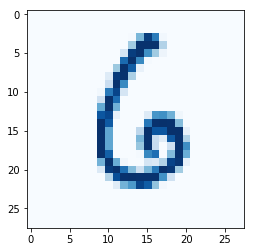

In [32]:
import random
import matplotlib.pyplot as plt
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Blues', interpolation='nearest')
plt.show()

# CNN

In [6]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
tf.reset_default_graph()

INPUT_SIZE = 28
LR = 0.01
N_CLASSES = 10
TRAINING_EPOCHS = 15
BATCH_SIZE = 100

X = tf.placeholder(tf.float32, [None, INPUT_SIZE * INPUT_SIZE])
X_img = tf.reshape(X, [-1, INPUT_SIZE, INPUT_SIZE, 1])
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

#卷积层将要计算出32个特征映射(feature map)，对每个3 * 3的patch。它的权值tensor的大小为[3, 3, 1, 32]. 前两维是patch的大小，第三维时输入通道的数目，最后一维是输出通道的数目。我们对每个输出通道加上了偏置(bias)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#卷积操作仅使用了滑动步长为1的窗口，使用0进行填充，所以输出规模和输入的一致
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') 
L1 = tf.nn.relu(L1)
#在2 * 2的窗口内采用最大池化技术(max-pooling)，padding='SAME'表示通过填充0，使得输入和输出的形状一致
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') 

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME') 
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])

W3 = tf.get_variable("W3", shape=[7 * 7 * 64, N_CLASSES], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([N_CLASSES]))
hypothesis = tf.matmul(L2, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=LR).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning stared. It takes sometime.')
for epoch in range(TRAINING_EPOCH):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / BATCH_SIZE)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        c, _, = sess.run([cost, optimizer], feed_dict= {X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning stared. It takes sometime.
('Epoch:', '0001', 'cost =', '0.165753783')
('Epoch:', '0002', 'cost =', '0.053980820')
('Epoch:', '0003', 'cost =', '0.040394988')
('Epoch:', '0004', 'cost =', '0.033517385')
('Epoch:', '0005', 'cost =', '0.029954070')
('Epoch:', '0006', 'cost =', '0.025651971')
('Epoch:', '0007', 'cost =', '0.024792020')
('Epoch:', '0008', 'cost =', '0.021648961')
('Epoch:', '0009', 'cost =', '0.022527923')
('Epoch:', '0010', 'cost =', '0.019885197')
('Epoch:', '0011', 'cost =', '0.016224105')
('Epoch:', '0012', 'cost =', '0.019094046')
('Epoch:', '0013', 'cost =', '0.018698463')
('Epoch:', '0014', 'cost =', '0.017875184')
('Epoch:', '0015', 'cost =', '0.013348344')
Learning Finished!
('Accuracy:', 0.9873)


('Label:', array([4]))
('Prediction:', array([4]))


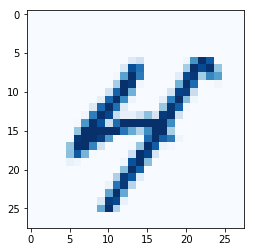

In [22]:
import random
import matplotlib.pyplot as plt

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Blues', interpolation='nearest')
plt.show()


# CNN2

# LSTM

In [217]:
tf.reset_default_graph()
TRAINING_EPOCH = 15
BATCH_SIZE = 100 
TIME_STEP = 28      
INPUT_SIZE = 28
N_CLASSES = 10
LR = 0.01
NUM_UNITS = 100

X = tf.placeholder(tf.float32, [None, TIME_STEP * INPUT_SIZE])
X_img = tf.reshape(X, [-1, TIME_STEP, INPUT_SIZE]) 
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

# TensorFlow 中，基础的 LSTM 单元格声明
#num_units 指一个 LSTM 单元格中的单元数。
#num_units 可以比作前馈神经网络中的隐藏层，前馈神经网络的隐藏层的节点数量等于每一个时间步中一个 LSTM 单元格内 LSTM 单元的 num_units 数量。
rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=NUM_UNITS) 
outputs,final_state = tf.nn.dynamic_rnn(
    cell=rnn_cell,      
    inputs=X_img, 
    initial_state=None, 
    dtype=tf.float32, 
    time_major=False )
#考虑最后一个时间步的输入，生成预测
hypothesis = tf.layers.dense(inputs=outputs[:, -1, :], units=N_CLASSES)  

cost = tf.losses.softmax_cross_entropy(onehot_labels=Y, logits=hypothesis)                             
optimizer = tf.train.AdamOptimizer(LR).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning stared. It takes sometime.')
for epoch in range(TRAINING_EPOCH):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / BATCH_SIZE)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        c, _, = sess.run([cost, optimizer], feed_dict= {X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(Y, axis=1),tf.argmax(output, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))


Learning stared. It takes sometime.
('Epoch:', '0001', 'cost =', '0.323201661')
('Epoch:', '0002', 'cost =', '0.095503352')
('Epoch:', '0003', 'cost =', '0.072249912')
('Epoch:', '0004', 'cost =', '0.058960173')
('Epoch:', '0005', 'cost =', '0.054015902')
('Epoch:', '0006', 'cost =', '0.044566705')
('Epoch:', '0007', 'cost =', '0.044167242')
('Epoch:', '0008', 'cost =', '0.043702604')
('Epoch:', '0009', 'cost =', '0.036726483')
('Epoch:', '0010', 'cost =', '0.037002085')
('Epoch:', '0011', 'cost =', '0.042591846')
('Epoch:', '0012', 'cost =', '0.042531952')
('Epoch:', '0013', 'cost =', '0.035891655')
('Epoch:', '0014', 'cost =', '0.039202791')
('Epoch:', '0015', 'cost =', '0.039374829')
Learning Finished!
('Accuracy:', 0.9817)


('Label:', array([5]))
('Prediction:', array([5]))


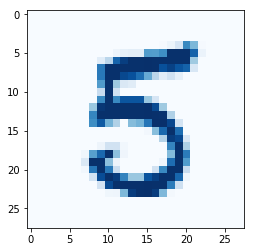

In [17]:
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Blues', interpolation='nearest')
plt.show()

In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist.train.num_examples

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


55000

In [18]:
batch_xs, batch_ys = mnist.train.next_batch(100)
print batch_xs.shape, batch_ys.shape

(100, 784) (100, 10)
